In [ ]:
#Import pandas library to read_csv files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

%matplotlib inline
%matplotlib notebook

In [4]:
covid19['ObservationDate']=pd.to_datetime(covid19['ObservationDate'])

In [ ]:
# Import all the datasets

In [2]:
covid19_df = pd.read_csv(r"C:/Users/Yuktha/Desktop/dataset/covid_19_india.csv")
covid19 = pd.read_csv(r"C:/Users/Yuktha/Desktop/dataset/covid_19_data.csv")
excel_file = pd.ExcelFile(r"C:/Users/Yuktha/Desktop/dataset/Indian States Population and Area.xlsx")
indian_states_df = excel_file.parse('Sheet1')

In [ ]:
# DATA INTERPRETATION
#let's analyse the data
#Checking the size of the data i.e no. of rows and columns

In [9]:
covid19_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [6]:
covid19_df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
4911,4912,06/08/20,8:00 AM,Telengana,-,-,52103,589,73050
4912,4913,06/08/20,8:00 AM,Tripura,-,-,3793,31,5725
4913,4914,06/08/20,8:00 AM,Uttarakhand,-,-,5233,98,8254
4914,4915,06/08/20,8:00 AM,Uttar Pradesh,-,-,60558,1857,104388
4915,4916,06/08/20,8:00 AM,West Bengal,-,-,58962,1846,83800


In [7]:
covid19_df.shape

(4916, 9)

In [ ]:
#Detecting missing values
#isna() function is used to detect missing values

In [8]:
covid19_df.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [ ]:
# Lets analyse the data according to the recent date  "06/08/20"
# check the total confiremd cases on the particular date

In [15]:
covid19_df_latest = covid19_df[covid19_df['Date']=="06/08/20"]
covid19_df_latest.head()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
4911,4912,06/08/20,8:00 AM,Telengana,-,-,52103,589,73050
4912,4913,06/08/20,8:00 AM,Tripura,-,-,3793,31,5725
4913,4914,06/08/20,8:00 AM,Uttarakhand,-,-,5233,98,8254
4914,4915,06/08/20,8:00 AM,Uttar Pradesh,-,-,60558,1857,104388
4915,4916,06/08/20,8:00 AM,West Bengal,-,-,58962,1846,83800


In [16]:
covid19_df_latest.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
4911,4912,06/08/20,8:00 AM,Telengana,-,-,52103,589,73050
4912,4913,06/08/20,8:00 AM,Tripura,-,-,3793,31,5725
4913,4914,06/08/20,8:00 AM,Uttarakhand,-,-,5233,98,8254
4914,4915,06/08/20,8:00 AM,Uttar Pradesh,-,-,60558,1857,104388
4915,4916,06/08/20,8:00 AM,West Bengal,-,-,58962,1846,83800


In [ ]:
# Analysing recent confirmed cases
# Total no. of confirmed cases as of date "06/08/20"
# Bar Graph representation of recent confirmed cases

In [11]:
covid19_df_latest['Confirmed'].sum()

1964536

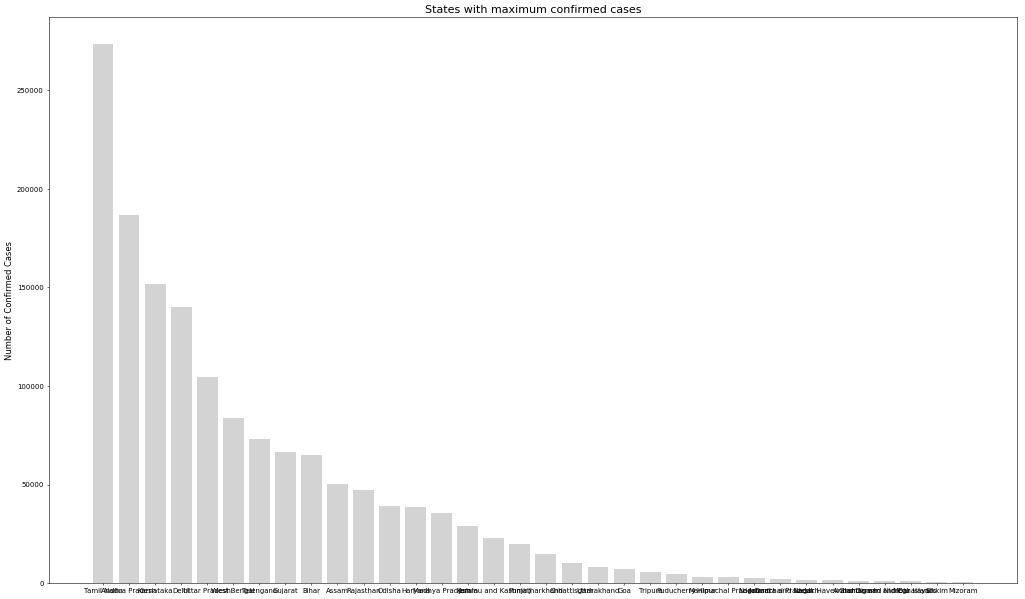

In [21]:
covid19_df_latest = covid19_df_latest.sort_values(by=['Confirmed'],ascending = False)
plt.figure(figsize=(25,15), dpi=50)
plt.bar(covid19_df_latest['State/UnionTerritory'][1:], covid19_df_latest['Confirmed'][1:], align='center',color='lightgrey')
plt.ylabel('Number of Confirmed Cases',size = 12)
plt.title('States with maximum confirmed cases',size = 16)
plt.show()


In [ ]:
# Analysing recent deaths 
# Total no. of deaths as of date "06/08/20"
# Bar Graph representation of recent deaths

In [18]:
covid19_df_latest['Deaths'].sum()

40699

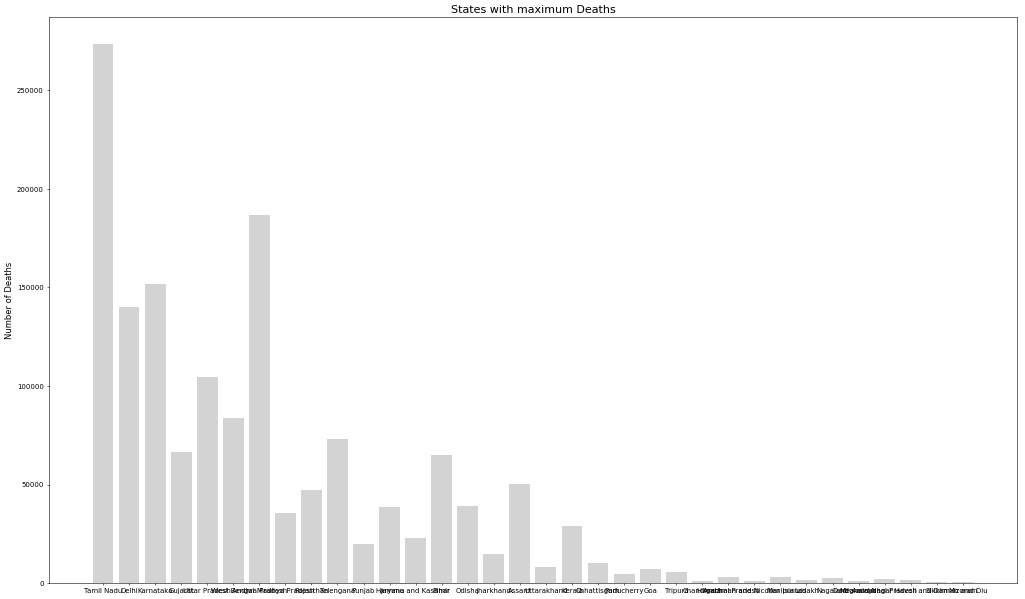

In [22]:
covid19_df_latest = covid19_df_latest.sort_values(by=['Deaths'],ascending = False)
plt.figure(figsize=(25,15), dpi=50)
plt.bar(covid19_df_latest['State/UnionTerritory'][1:], covid19_df_latest['Confirmed'][1:], align='center',color='lightgrey')
plt.ylabel('Number of Deaths',size = 12)
plt.title('States with maximum Deaths',size = 16)
plt.show()

In [ ]:
# Calculating deaths per confirmed cases according to state wise
# Creating a new column "Deaths/Confirmed Cases" 
# logic : ("Confirmed/Deaths")

In [24]:
covid19_df_latest['Deaths/Confirmed Cases'] = (covid19_df_latest['Confirmed']/covid19_df_latest['Deaths']).round(2)
covid19_df_latest['Deaths/Confirmed Cases'] = [np.nan if x==float("inf") else x for x in covid19_df_latest['Deaths/Confirmed Cases']]
covid19_df_latest = covid19_df_latest.sort_values(by=['Deaths/Confirmed Cases'],ascending=True, na_position='last')
covid19_df_latest.iloc[:10]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Deaths/Confirmed Cases
4891,4892,06/08/20,8:00 AM,Gujarat,-,-,49433,2556,66669,26.08
4900,4901,06/08/20,8:00 AM,Maharashtra,-,-,305521,16476,468265,28.42
4889,4890,06/08/20,8:00 AM,Delhi,-,-,126116,4044,140232,34.68
4899,4900,06/08/20,8:00 AM,Madhya Pradesh,-,-,26064,929,35734,38.47
4907,4908,06/08/20,8:00 AM,Punjab,-,-,12943,491,19856,40.44
4915,4916,06/08/20,8:00 AM,West Bengal,-,-,58962,1846,83800,45.40
4894,4895,06/08/20,8:00 AM,Jammu and Kashmir,-,-,15244,426,22955,53.88
4896,4897,06/08/20,8:00 AM,Karnataka,-,-,74679,2804,151449,54.01
4914,4915,06/08/20,8:00 AM,Uttar Pradesh,-,-,60558,1857,104388,56.21
4910,4911,06/08/20,8:00 AM,Tamil Nadu,-,-,214815,4461,273460,61.30


In [ ]:
# Data Interpretation
# Analysing indian_states_df dataset. i.e no. Of rows and columns

In [25]:
indian_states_df.head()

,State,Aadhaar assigned as of 2019,Area (per sq km)
0,Delhi,21763471,1483
1,Haryana,28941133,44212
2,Kerala,36475649,38852
3,Himachal Pradesh,7560770,55673
4,Punjab,30355185,50362


In [32]:
covid19_df_latest = covid19_df_latest.drop(['Sno','Date','Time','ConfirmedIndianNational','ConfirmedForeignNational'], axis=1)
covid19_df_latest.shape

(35, 5)

In [ ]:
# MERGING DATASETS
# Let's merge two datasets namely "covid19_df_latest" and "indian_states_df"
# merging of two datasets can be done on common column  "State/UnionTerritory"


# Calculating "Cases per 10 million"
# logic : (Confirmed/Population)*10000000
# New column by name "Cases/10million" is created in our dataset

In [42]:
covid19_df_latest = pd.merge(covid19_df_latest,indian_states_df,on="State/UnionTerritory")
covid19_df_latest['Cases/10million'] = (covid19_df_latest['Confirmed']/covid19_df_latest['Population'])*10000000
covid19_df_latest.head()

,State/UnionTerritory,Cured,Deaths,Confirmed,Deaths/Confirmed Cases,Population,Cases/10million
0,Gujarat,49433,2556,66669,26.08,62097024,10736.263303
1,Maharashtra,305521,16476,468265,28.42,114063427,41053.036220
2,Delhi,126116,4044,140232,34.68,21763471,64434.574797
3,Madhya Pradesh,26064,929,35734,38.47,74770270,4779.172257
4,Punjab,12943,491,19856,40.44,30355185,6541.221870


In [ ]:
# Sorting Values
# Sort values of "Cases/10million" in descending order

In [43]:
covid19_df_latest.fillna(0,inplace=True)
covid19_df_latest.sort_values(by='Cases/10million',ascending=False)

,State/UnionTerritory,Cured,Deaths,Confirmed,Deaths/Confirmed Cases,Population,Cases/10million
24,Ladakh,1164,7,1592,227.43,210156,75753.249967
27,Assam,35892,121,50445,416.90,6755448,74673.063874
2,Delhi,126116,4044,140232,34.68,21763471,64434.574797
16,Goa,5287,64,7423,115.98,1587012,46773.433345
1,Maharashtra,305521,16476,468265,28.42,114063427,41053.036220
15,Andhra Pradesh,104354,1681,186461,110.92,49145456,37940.638907
8,Tamil Nadu,214815,4461,273460,61.30,72344821,37799.526797
11,Puducherry,2668,65,4433,68.20,1286189,34466.163216
6,Karnataka,74679,2804,151449,54.01,62462743,24246.293507
26,Nagaland,685,6,2498,416.33,1262729,19782.550333


In [ ]:
# SCATTER PLOT
# Let's plot states which has 'confirmed cases' >= 1000 or 'Cases/10million' >= 200
# Labelling : y axis -"Number of cases per 10 million" and x axis -"Number of confirmed Cases"
# Labelling of graph as 'Visulization to display the variation in covid 19 figures in different Indian sates'

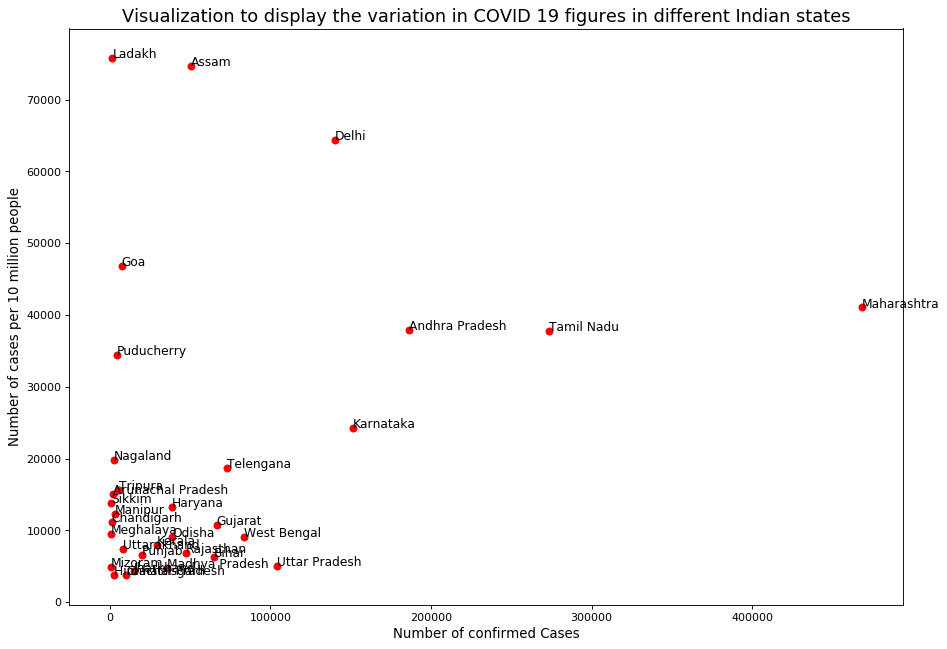

In [44]:
df = covid19_df_latest[(covid19_df_latest['Confirmed']>=1000) | (covid19_df_latest['Cases/10million']>=200)]
plt.figure(figsize=(12,8), dpi=80)
plt.scatter(covid19_df_latest['Confirmed'], covid19_df_latest['Cases/10million'],alpha=0.5)
plt.xlabel('Number of confirmed Cases',size=12)
plt.ylabel('Number of cases per 10 million people',size=12)
plt.scatter(df['Confirmed'],df['Cases/10million'],color="red")

for i in range(df.shape[0]):
    plt.annotate(df['State/UnionTerritory'].tolist()[i], xy=(df['Confirmed'].tolist()[i], df['Cases/10million'].tolist()[i]),
                 xytext = (df['Confirmed'].tolist()[i]+1.0,df['Cases/10million'].tolist()[i]+12.0),size=11)
plt.tight_layout()
plt.title('Visualization to display the variation in COVID 19 figures in different Indian states',size=16)
plt.show()    

In [ ]:
# HEATMAP representation
# plot data of correlation of covid19_df_latest through heatmap

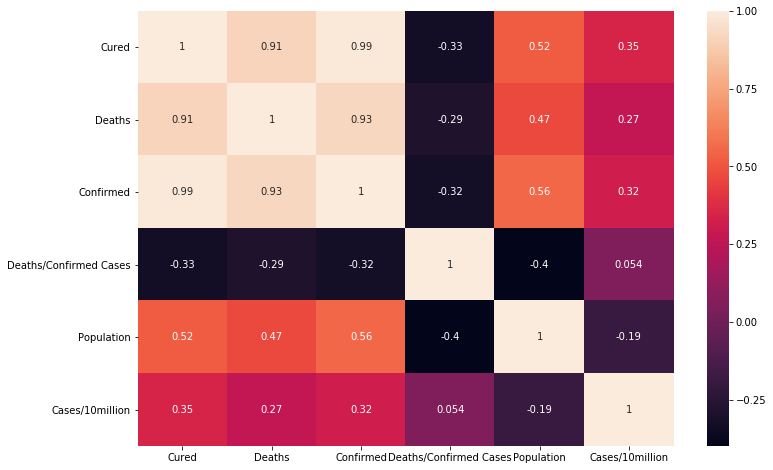

In [45]:
plt.figure(figsize = (12,8))
sns.heatmap(covid19_df_latest.corr(), annot=True)

In [ ]:
# Let's us build a strong model that predicts how the virus could spread across different countries and regions which may 
# be able to help mitigation efforts. The goal of this task is to build a model that predicts the progression of the virus
# throughtout March 2020.

In [5]:
covid19['Country/Region']=covid19['Country/Region'].astype('str')
covid19['Province/State']=covid19['Province/State'].astype('str')
covid19['day']=covid19['ObservationDate'].dt.day
covid19['month']=covid19['ObservationDate'].dt.month
lbl=preprocessing.LabelEncoder()
for c in ['Province/State','Country/Region']:
    lbl.fit(covid19[c].unique())
    covid19[c]=lbl.transform(covid19[c])
x=covid19.drop(['Confirmed','SNo','Last Update','ObservationDate'],1)
y=covid19['Confirmed']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [6]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score

print(' R2 Score   : ',r2_score(y_test, y_pred))

 R2 Score   :  0.560268047951994
